In [1]:
# 영화 리뷰 분류 예쩨

import keras
keras.__version__

'2.8.0'

In [2]:
from keras.datasets import imdb
# 영화 리뷰 데이터를 가져온다.
(train_data, train_label),(test_data,test_label) = imdb.load_data(num_words=10000)
#설정을 하지 않으면 전체 데이터를 다 가져온다.
#num_words : 원하는 데이터의 갯수를 골라서 가져온다.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_label[0]

1

In [5]:
train_label[1]

0

In [6]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    # len(sequences),dimension 의 경우 1개의 값으로 인식해야하기 때문에 괄호를 한번 더 넣어줘야한다.(튜플)
    
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [22]:
# layer 의 정보의 수를 줄여나갈수는 있지만 늘릴수는 없다.
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) #들어올때만 지정하면 나머지는 알아서 한다.
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [23]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss=losses.binary_crossentropy, # 분류 문제는 crossentropy 이다.
             metrics=metrics.binary_accuracy)

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
#model.fit(partial_x_train, 
#          partial_y_train,
#          epochs=20,
#          batch_size=512)

In [26]:
history = model.fit(partial_x_train, 
          partial_y_train,
          epochs=3,
          batch_size=512,
                   validation_data=(x_val,y_val))
#validation_data : 검증작업을 한다., 

Epoch 1/3
30/30 [==============================] - 1s 21ms/step - loss: 0.5091 - binary_accuracy: 0.7927 - val_loss: 0.4198 - val_binary_accuracy: 0.8245
Epoch 2/3
30/30 [==============================] - 0s 13ms/step - loss: 0.3035 - binary_accuracy: 0.9028 - val_loss: 0.2986 - val_binary_accuracy: 0.8901
Epoch 3/3
30/30 [==============================] - 0s 11ms/step - loss: 0.2184 - binary_accuracy: 0.9273 - val_loss: 0.3162 - val_binary_accuracy: 0.8728


In [27]:
history_dict= history.history
# history : 기록을 본다.
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [28]:
import matplotlib.pyplot as plt

In [29]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#횟수를 시행할수록 손실은 줄어든다, 
#하지만 검증손실은 학습용 데이터에 과적합이 되어서 오히려 늘어나게된다.

epochs = range(1,len(acc)+1)

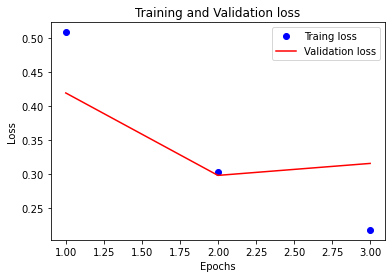

In [30]:
plt.plot(epochs,loss,'bo',label='Traing loss')
plt.plot(epochs,val_loss,'r-',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

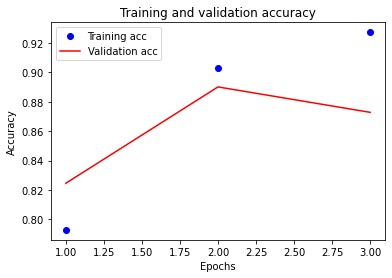

In [31]:
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'r-', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

In [32]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 871us/step - loss: 0.3418 - binary_accuracy: 0.8579


In [33]:
results
#왼쪽 Loss 값, 오른쪽 Accuracy

[0.3417663276195526, 0.8578799962997437]

In [34]:
model.predict(x_test)
# 1에 가까울수록 긍정적인 내용

array([[0.22839722],
       [0.99801815],
       [0.6141619 ],
       ...,
       [0.10868439],
       [0.10935974],
       [0.30950958]], dtype=float32)